<ipython-input-2-66ef55667c2b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


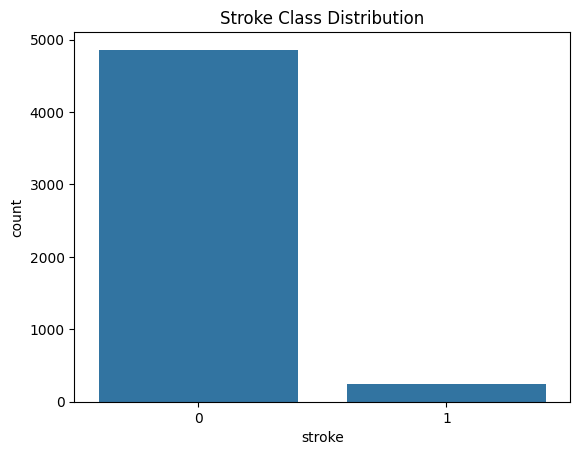

Logistic Regression: {'Accuracy': 0.9393346379647749, 'F1 Score': 0.0}
Random Forest: {'Accuracy': 0.9393346379647749, 'F1 Score': 0.0}
Best RF Parameters: {'max_depth': None, 'n_estimators': 100}
Best RF F1 Score: 0.02068302068302068


In [2]:
# Task 1: Classification - Heart Stroke Prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess Data
df = pd.read_csv('/content/drive/MyDrive/HIT391-Tutorial/healthcare-dataset-stroke-data.csv')
df['bmi'].fillna(df['bmi'].median(), inplace=True)

le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = le.fit_transform(df[col])

# Step 2: EDA
sns.countplot(x='stroke', data=df)
plt.title('Stroke Class Distribution')
plt.show()

# Step 3: Feature Engineering
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Models
lr = LogisticRegression()
lr.fit(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Step 5: Evaluate Models
def evaluate_model(model):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, zero_division=1)
    }

lr_results = evaluate_model(lr)
rf_results = evaluate_model(rf)

print("Logistic Regression:", lr_results)
print("Random Forest:", rf_results)

# Step 6: Fine Tuning RF
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)

print("Best RF Parameters:", grid.best_params_)
print("Best RF F1 Score:", grid.best_score_)


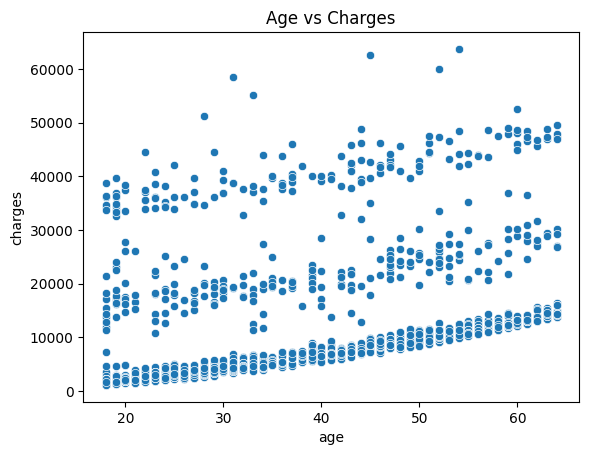

Linear Regression: {'MAE': 4181.194473753652, 'RMSE': np.float64(5796.284659276275)}
Random Forest Regressor: {'MAE': 2568.608627960604, 'RMSE': np.float64(4597.056133402249)}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 100}
Best RF RMSE: 4690.524083898462


In [3]:
# Task 2: Regression - Medical Insurance Cost Prediction

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load and Preprocess Data
df2 = pd.read_csv('/content/drive/MyDrive/HIT391-Tutorial/insurance.csv')
df2 = pd.get_dummies(df2, columns=['sex', 'smoker', 'region'], drop_first=True)

# Step 2: EDA
sns.scatterplot(x='age', y='charges', data=df2)
plt.title('Age vs Charges')
plt.show()

# Step 3: Feature Engineering
X = df2.drop('charges', axis=1)
y = df2['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train Models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Step 5: Evaluate Models
def evaluate_regression(model):
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

lr_eval = evaluate_regression(lin_reg)
rf_eval = evaluate_regression(rf_reg)

print("Linear Regression:", lr_eval)
print("Random Forest Regressor:", rf_eval)

# Step 6: Fine Tuning RF
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print("Best RF Parameters:", grid.best_params_)
print("Best RF RMSE:", -grid.best_score_)
